<a href="https://colab.research.google.com/github/Merenguimona/act_2/blob/main/notebook/Actividad_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://upload.wikimedia.org/wikipedia/commons/4/42/UNIR_Horizontal_Logo.png)
# __ACTIVIDAD 2__
## ASIGNATURA:
DOCENTE : BARBARO FERRO


ESTUDIANTES:

## __Objetivo de la actividad__
Esta actividad, nos permitió utilizar funcionalidades de las bases de datos NoSQL, en concreto MongoDB y Neo4J.
A lo largo de esta actividad, realizamos una serie de ejercicios donde monitorizamos la actividad de la base de datos de MongoDB y diseñamos un grafo que nos permitió visualizar un conjunto de datos extraidos en Neo4J.

## **Pautas de elaboración**

Para esta actividad, se procesaron diferentes ficheros sobre MongoDb mientras monitorizamos la activida de la base de datos. Finalmente, con un conjunto de datos extraídos de MongoDB, obtuvimos un grafo de que muestra determinadas relaciones entre estos. Para la realización de la actividad grupal se desarrollaron los apartados enunciados a continuación.

## **Inicio de la monitorización en MongoDB**

__a.__  Se solicita abrir en una consola, diferente al mongoshell, el `mongostat --discover`.\
__b.__ En una consola distinta, se solicita visualizar el top de las operaciones contra la base de datos, utilizando la instrucción `mongotop 5`, donde 5 es el tiempo en segundo que debe de refrescar la visualización.\
__c.__ Además se solicita tener estas consolas siempre activas y visibles mientras se realizan los puntos siguientes, interpretando sus salidas y describiendo brevemente que muestran cuando se ejecutan dichas instrucciones. Para ello se utilizarán capturas de pantalla para ilutrar nuestras respuestas.

__RESPUESTA AL PUNTO A__

__Mongostat__ es una herramienta de monitorización en tiempo real que muestra, por defecto cada un segundo, las estadisticas del servidor.
En la siguiente imagen se observa que el `mongostat` entrega datos sobre:
1. **host** ➡ indica el servidor o instancia de MongoDB que se esta monitorizando.
2. **insert** ➡ indica el número de operaciones de inserción `(insert)` por segundo.
3. **query** ➡ indica el número de consultas `(find)`.
4. **update** ➡ muestra el número de actualizaciones por segundo `(update)`
5. **delete** ➡ número de documentos eliminados `(delete)`
6. **getmore** ➡ muestra las operaciones de `(getMore)` por segundo, se utilizan cuando una consulta devuelve muchos documentos y MongoDB los envía en lotes, es común cuando se utilizan cursores grandes.
7. **command** ➡ muestra la cantidad de comandos internos como `ping`, `aggregate`, `count`, `listColections`
8. **dirty** ➡ porcentaje de memoria sucia, es decir datos modificados en RAM que no se han escrito en el disco, valores bajos son normales.
9. **flushes** ➡ número de operaciones de escritura a disco (flush), indica cuándo los datos en memoria persisten
10. **vsize**  ➡ cantidad de memoria virtual asignada a MongoDB
11. **res** ➡ memoria realmente usada en RAM por MongoDB
12. **qrw** ➡ número de operaciones en cola (queued readers/writers)
13. **arw** ➡ Número de operaciones activas en ejecución (active readers/writers)
14. **net_in** ➡ cantidad de datos recibidos por MongoDb desde la red, se muestra en bytes `b` o en kilobytes `k`
15. **net_out** ➡ cantidad de datos enviados por MongoDB a la red, esto refleja respuestas a clientes.
16. **conn** ➡ número de conexiones activas al servidor MongoDB, esto incluye el mongosh, mongostat, entre otros.
17. y finalmente **time** ➡ fecha y hora exacta en la que se capturo la estadísitica.


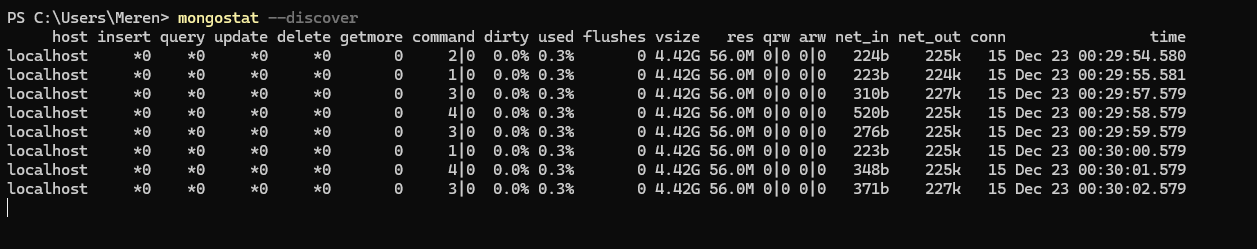



**RESPUESTA AL PUNTO B**

`Mongotop` permite monitorear en tiempo real, en este caso en particular cada 5 segundos, el tiempo que dedica MongoDB a operaciones de lectura (como por ejemplo `find`, `aggregate`) y escritura (por ejemplo `insert`, `update`, `delete)` **por colección**.

Al decir cero, quiere decir que el servidor esta en reposo, que las colecciones están, pero no tienen un uso activo en el momento de la observación, y es con esta herramienta que se puede observar si hay cuellos de botella o cargas.

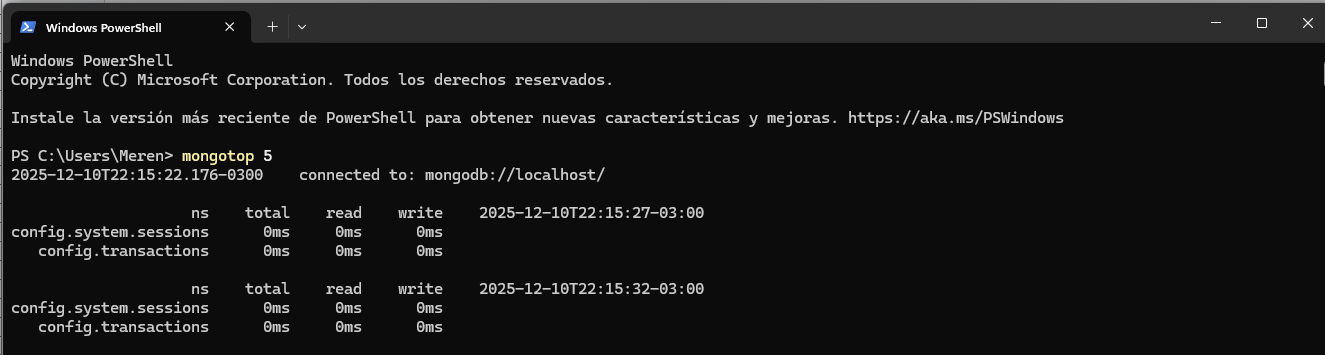

**RESPUESTA A PUNTO C**

En esta etapa se mantuvieron las consolas siempre activas, mientras se realizaron los puntos del d al f, que se enunciaran en el siguiente bloque.

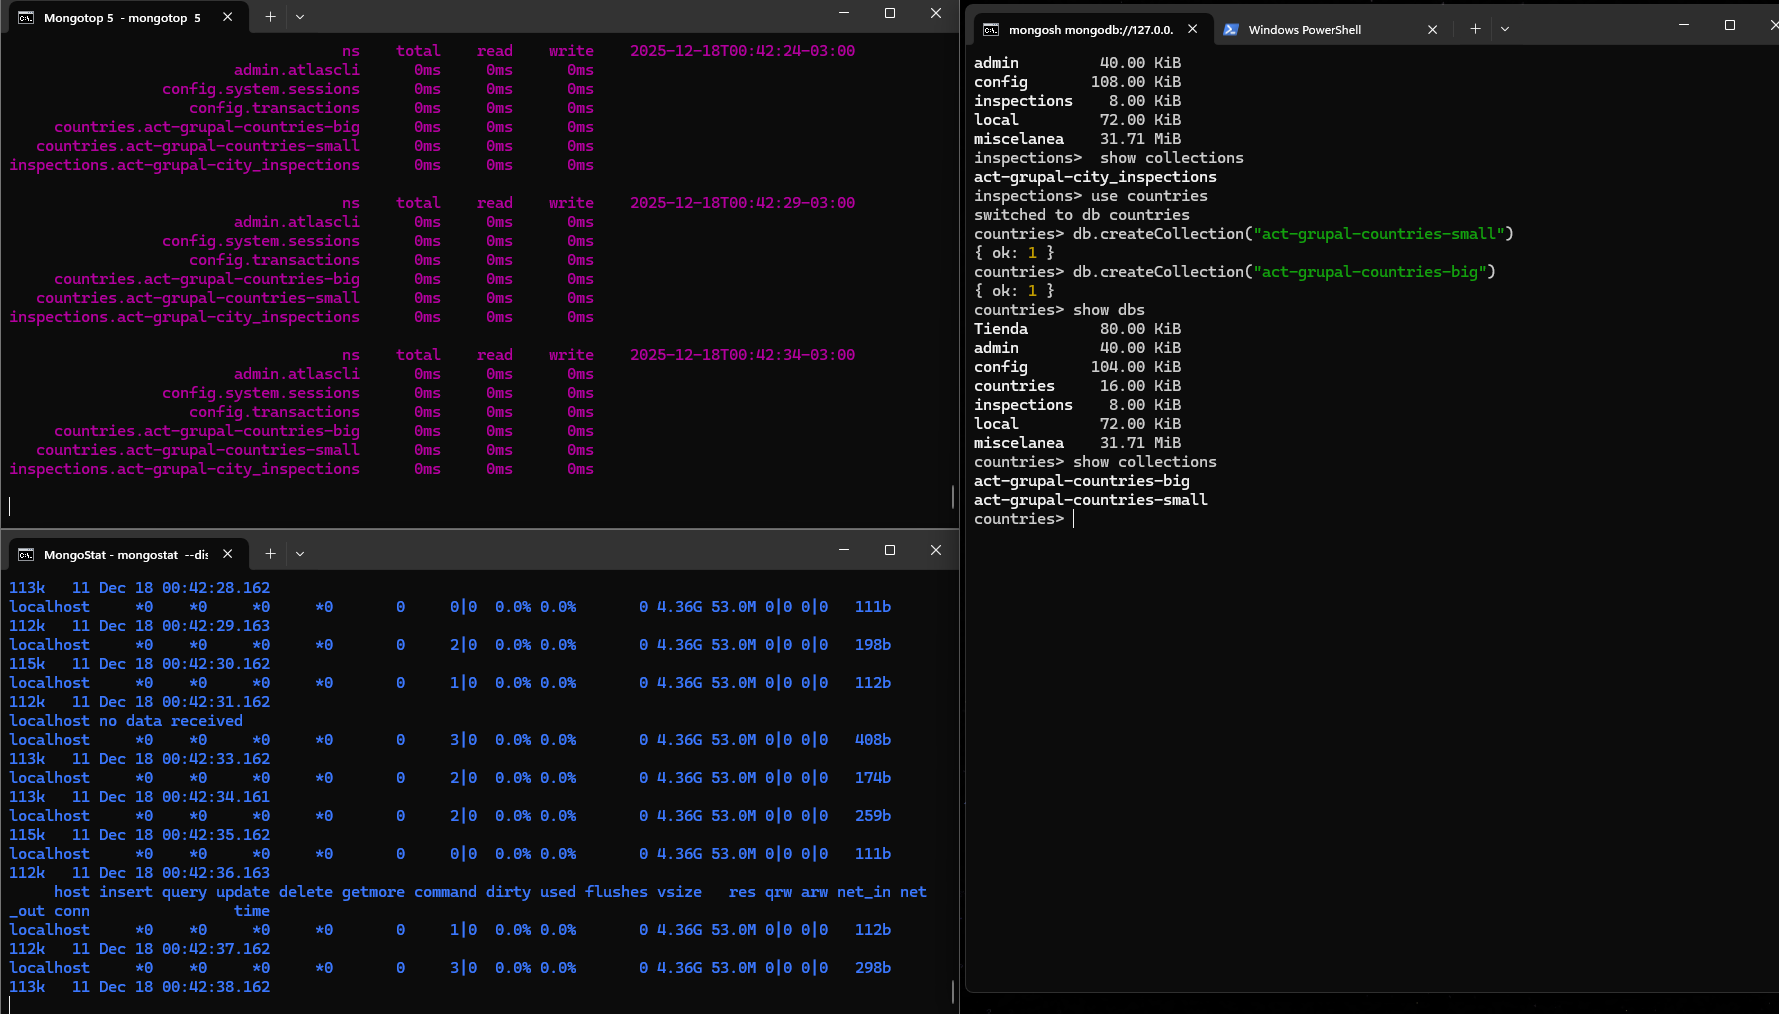

# **Actividad grupal 2**

## __Contexto del Caso de uso__

**Caso de uso**: restricción de terrazas en Madrid por covid-19.\

 Contratan a nuestro equipo para actualizar las restricciones de ciertos locales y terrazas en Madrid por cuestiones del covid-19. Los datos para actualizar están en el fichero llamado act-grupal-openDataLocalesMadrid.cvs y se nos solicita que consolidemos dichos cambios en una base de datos MongoDB llamada Madrid con la colección Terrazas. La información del dataset a utilizar lo obtenemos en la siguiente [URL: Open Data Censo de locales, sus actividades y terrazas de hostelería y restauración (Terrazas)](https://datos.madrid.es/FWProjects/egob/Catalogo/Economia/Ficheros/Estructura_DS_FicheroCLA_Terrazas.pdf)

En el alcance del contrato se nos solicita:

a. Convertir el fichero CVS a formato JSON.\
b. Descargar el fichero generado en el paso anterior, en formato JSON indicando la opción Array. En el fichero hay un problema de espacios en muchos campos de tipo String, que se solicitan corregir en esta etapa.\
c. Editar el archivo generado, y al principio de todo añadir la línea: `var datos_insertar =`\
d. Guardar el fichero en una ruta conocida y cambiar su extensión a formato .js y explicar que tipo de fichero es un `.js`\
e. Abrir el cliente *mongo* y ejecutar las siguientes instrucciones:\
        `load("PATH\fichero.js")`\
        `datos_insertar[0]`\
f. Describir brevemente las instrucciones anteriores\
g. Se consulta si con el elemento: `datos_insertar ` ¿se podría realizar un ´insert´ masivo? ¿Cómo?\
h. Desde la terminar, nos solicitar proponer una alternativa que evite realizar los pasos anteriores, con una descripción de máximo de dos líneas.  

### **a. Convertir el fichero CVS a formato JSON**

En la actividad se solicita transformar el fichero CVS a JSON, utilizando como ejemplo la herramienta disponible en [](https://csvjson.com/csv2json). Sin embargo esta herramienta no nos permite realizar limpiar la base de datos de los campos en blanco que tiene al final, ni de eliminar los espacios en blanco que hay en los datos de tipo string presentes en la base de datos, por lo realizaremos el siguiente flujo de trabajo antes de continuar con el paso c:

1. Subir archivo CVS al notebook desde el repo creado en GitHub
2. Limpiar CVS de los campos vacios al final de la DB
3. Limpiar los espacios entre los datos de tipo String presentes en la base de datos
4. Convertir la base de datos a JSON para su lectura en MongoDB

In [ ]:
#Se prepara el entorno de trabajo y se generan las variables
#necesarias para realizar los puntos 1 al 4

from pathlib import Path  # importa módulo de Python que sirve para trabajar con rutas y archivos
import re                 # Módulo para trabajar con expresiones regulares (regex) -> (;+$) nos permitirá limpiar los espacios en blanco, sin afectar los datos
import json               # nos permitirá leer, escribir y exportar en formato JSON cuando sea necesario
import pandas as pd       # libreria de Python que permite realizar limpieza de datos, análisis exploratorio de datos, manipulación de datos entre otros. Necesaría para nuestro trabajo
import requests           # herramienta estándar de python que simplifica la peticiones HTTP (como GET, POST, etc.) a servidores web y APIs. Esto para conectar Github con el notebook

##Mostrará lo que se esta ejecutando
VERBOSE = True
def vlog(*args):
    if VERBOSE:
        print(*args)

#Preparación de variables de rutas locales
base_dir = Path(".")
csv_in = base_dir / "act-grupal-openDataLocalesMadrid.csv"
csv_out = base_dir / "openDataLocalesMadrid_clean.csv"
json_out = base_dir / "openDataLocalesMadrid_array.json"
js_out = base_dir / "openDataLocalesMadrid.js"

#Tipo de separador del archivo CVS
sep = ";"

#URL pública (raw) del CVS alojado en nuestro GitHub
URL_CVS = "https://raw.githubusercontent.com/Merenguimona/act_2/main/data/act-grupal-openDataLocalesMadrid.csv"